## Load and Resize Images with TensorFlow

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# read images path
import glob
samples = glob.glob('samples/*.jpg')

In [11]:
# shuffle and split training / testing set
train_split=0.9
nb_train = int(train_split*len(samples))
np.random.shuffle(samples)
train_samples = samples[:nb_train]
test_samples = samples[nb_train:]

In [14]:
# split train / test folder
import os, shutil
path_train = os.path.join('samples', 'train')
path_test = os.path.join('samples', 'test')

# delete folder if exists
if os.path.exists(path_train): shutil.rmtree(path_train)
if os.path.exists(path_test): shutil.rmtree(path_test)
    
# create new folder
os.mkdir(path_train)
os.mkdir(path_test)

# move files
for img in train_samples: shutil.move(img, path_train)
for img in test_samples: shutil.move(img, path_test)

In [17]:
# load image in binary format
# decode images into int array
fname = os.path.join(path_train, os.path.basename(train_samples[0]))
img_raw = tf.io.read_file(fname)
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape) # (height, width, channel)
print(img_tensor.dtype) # int [0, 255]

(64, 168, 3)
<dtype: 'uint8'>


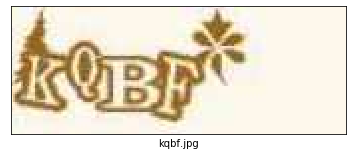

In [18]:
# show original image
plt.imshow(img_tensor)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel(train_samples[0][-8:])
plt.show()

In [19]:
# resize
img = tf.image.resize(img_tensor, [60, 120])
img = img / 255.0
img.shape, img.dtype

(TensorShape([60, 120, 3]), tf.float32)

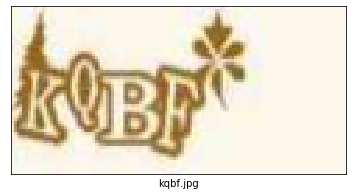

In [20]:
# show resized image
plt.imshow(img)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel(train_samples[0][-8:])
plt.show()